<a href="https://colab.research.google.com/github/srilaxmi23670/Machine_Learning/blob/main/LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

In [ ]:
# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

In [ ]:
# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# normalize unicode characters
			line = normalize('NFD', line).encode('ascii', 'ignore')
			line = line.decode('UTF-8')
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove non-printable chars form each token
			line = [re_print.sub('', w) for w in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)

In [ ]:
import string
import re
from pickle import dump
from unicodedata import normalize
from numpy import array

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, mode='rt', encoding='utf-8')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# split a loaded document into sentences
def to_pairs(doc):
	lines = doc.strip().split('\n')
	pairs = [line.split('\t') for line in  lines]
	return pairs

# clean a list of lines
def clean_pairs(lines):
	cleaned = list()
	# prepare regex for char filtering
	re_print = re.compile('[^%s]' % re.escape(string.printable))
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for pair in lines:
		clean_pair = list()
		for line in pair:
			# normalize unicode characters
			line = normalize('NFD', line).encode('ascii', 'ignore')
			line = line.decode('UTF-8')
			# tokenize on white space
			line = line.split()
			# convert to lowercase
			line = [word.lower() for word in line]
			# remove punctuation from each token
			line = [word.translate(table) for word in line]
			# remove non-printable chars form each token
			line = [re_print.sub('', w) for w in line]
			# remove tokens with numbers in them
			line = [word for word in line if word.isalpha()]
			# store as string
			clean_pair.append(' '.join(line))
		cleaned.append(clean_pair)
	return array(cleaned)

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
filename = 'deu.txt'
doc = load_doc(filename)
# split into english-german pairs
pairs = to_pairs(doc)
# clean sentences
clean_pairs = clean_pairs(pairs)
# save clean pairs to file
save_clean_data(clean_pairs, 'english-german.pkl')
# spot check
for i in range(100):
	print('[%s] => [%s]' % (clean_pairs[i,0], clean_pairs[i,1]))

Saved: english-german.pkl
[hi] => [hallo]
[hi] => [gru gott]
[run] => [lauf]
[wow] => [potzdonner]
[wow] => [donnerwetter]
[fire] => [feuer]
[help] => [hilfe]
[help] => [zu hulf]
[stop] => [stopp]
[wait] => [warte]
[hello] => [hallo]
[i try] => [ich probiere es]
[i won] => [ich hab gewonnen]
[i won] => [ich habe gewonnen]
[smile] => [lacheln]
[cheers] => [zum wohl]
[freeze] => [keine bewegung]
[freeze] => [stehenbleiben]
[got it] => [verstanden]
[got it] => [einverstanden]
[he ran] => [er rannte]
[he ran] => [er lief]
[hop in] => [mach mit]
[hug me] => [druck mich]
[hug me] => [nimm mich in den arm]
[hug me] => [umarme mich]
[i fell] => [ich fiel]
[i fell] => [ich fiel hin]
[i fell] => [ich sturzte]
[i fell] => [ich bin hingefallen]
[i fell] => [ich bin gesturzt]
[i know] => [ich wei]
[i lied] => [ich habe gelogen]
[i lost] => [ich habe verloren]
[im] => [ich bin jahre alt]
[im] => [ich bin]
[im ok] => [mir gehts gut]
[im ok] => [es geht mir gut]
[no way] => [unmoglich]
[no way] => [da

In [ ]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle
from keras.preprocessing.text import Tokenizer

# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('english-german.pkl')

# reduce dataset size
n_sentences = 10000
dataset = raw_dataset[:n_sentences, :]
# random shuffle
shuffle(dataset)
# split into train/test
train, test = dataset[:9000], dataset[9000:]
# save
save_clean_data(dataset, 'english-german-both.pkl')
save_clean_data(train, 'english-german-train.pkl')
save_clean_data(test, 'english-german-test.pkl')

Saved: english-german-both.pkl
Saved: english-german-train.pkl
Saved: english-german-test.pkl


In [ ]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# load datasets
dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')

In [ ]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# load datasets
dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')

In [ ]:
# fit a tokenizer
def create_tokenizer(lines):
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [ ]:
# max sentence length
def max_length(lines):
	return max(len(line.split()) for line in lines)

In [ ]:
# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % (eng_length))
# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])
print('German Vocabulary Size: %d' % ger_vocab_size)
print('German Max Length: %d' % (ger_length))

English Vocabulary Size: 2404
English Max Length: 5
German Vocabulary Size: 3856
German Max Length: 10


In [ ]:
# encode and pad sequences
from keras.preprocessing.sequence import pad_sequences

def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

In [ ]:
# one hot encode target sequence
import keras
import keras.utils
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical

def encode_output(sequences, vocab_size):
	ylist = list()
	for sequence in sequences:
		encoded = to_categorical(sequence, num_classes=vocab_size)
		ylist.append(encoded)
	y = array(ylist)
	y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
	return y

In [ ]:
# prepare training data
from keras.preprocessing.sequence import pad_sequences

trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)
# prepare validation data
testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 256)           987136    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 5, 256)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5, 256)            525312    
_________________________________________________________________
time_distributed_2 (TimeDist (None, 5, 2404)           617828    
Total params: 2,655,588
Trainable params: 2,655,588
Non-trainable params: 0
_________________________________________________________________
None


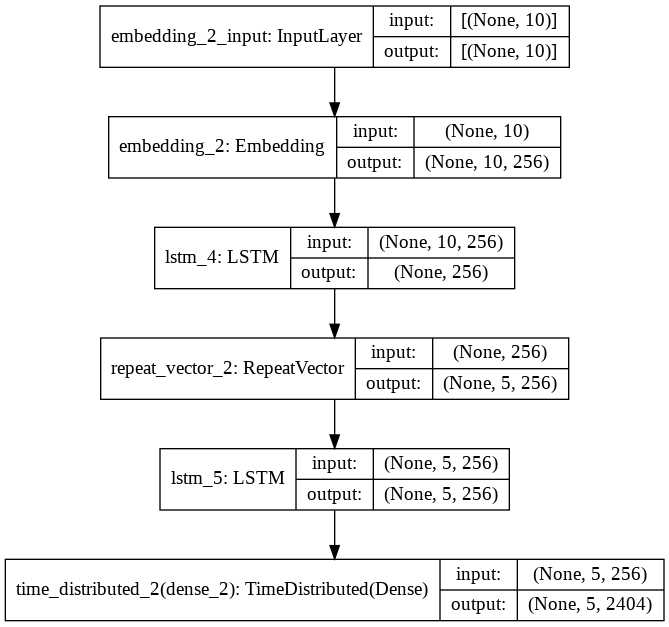

In [ ]:
# define NMT model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding, Bidirectional,RepeatVector,TimeDistributed
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True))
	model.add(LSTM(n_units))
	model.add(RepeatVector(tar_timesteps))
	model.add(LSTM(n_units, return_sequences=True))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model

# define model
model = define_model(ger_vocab_size, eng_vocab_size, ger_length, eng_length, 256)
model.compile(optimizer='adam', loss='categorical_crossentropy')
# summarize defined model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# fit model
filename = 'model.h5'
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), callbacks=[checkpoint], verbose=2)

Epoch 1/30
141/141 - 25s - loss: 3.3659 - val_loss: 3.4333

Epoch 00001: val_loss improved from inf to 3.43332, saving model to model.h5
Epoch 2/30
141/141 - 25s - loss: 3.1993 - val_loss: 3.3398

Epoch 00002: val_loss improved from 3.43332 to 3.33978, saving model to model.h5
Epoch 3/30
141/141 - 25s - loss: 3.0605 - val_loss: 3.2085

Epoch 00003: val_loss improved from 3.33978 to 3.20848, saving model to model.h5
Epoch 4/30
141/141 - 25s - loss: 2.9113 - val_loss: 3.0999

Epoch 00004: val_loss improved from 3.20848 to 3.09986, saving model to model.h5
Epoch 5/30
141/141 - 26s - loss: 2.7691 - val_loss: 3.0046

Epoch 00005: val_loss improved from 3.09986 to 3.00457, saving model to model.h5
Epoch 6/30
141/141 - 25s - loss: 2.6196 - val_loss: 2.8949

Epoch 00006: val_loss improved from 3.00457 to 2.89491, saving model to model.h5
Epoch 7/30
141/141 - 25s - loss: 2.4642 - val_loss: 2.7981

Epoch 00007: val_loss improved from 2.89491 to 2.79814, saving model to model.h5
Epoch 8/30
141/14

In [65]:
# max sentence length
from pickle import load
from numpy import array
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

def max_length(lines):
	return max(len(line.split()) for line in lines)

# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
	# integer encode sequences
	X = tokenizer.texts_to_sequences(lines)
	# pad sequences with 0 values
	X = pad_sequences(X, maxlen=length, padding='post')
	return X

In [66]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

In [67]:
# generate target given source sequence
def predict_sequence(model, tokenizer, source):
	prediction = model.predict(source, verbose=0)[0]
	integers = [argmax(vector) for vector in prediction]
	target = list()
	for i in integers:
		word = word_for_id(i, tokenizer)
		if word is None:
			break
		target.append(word)
	return ' '.join(target)

In [68]:
# evaluate the skill of the model
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu

def evaluate_model(model, tokenizer, sources, raw_dataset):
	actual, predicted = list(), list()
	for i, source in enumerate(sources):
		# translate encoded source text
		source = source.reshape((1, source.shape[0]))
		translation = predict_sequence(model, eng_tokenizer, source)
		raw_target, raw_src = raw_dataset[i]
		if i < 10:
			print('src=[%s], target=[%s], predicted=[%s]' % (raw_src, raw_target, translation))
		actual.append([raw_target.split()])
		predicted.append(translation.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [71]:
# load datasets

dataset = load_clean_sentences('english-german-both.pkl')
train = load_clean_sentences('english-german-train.pkl')
test = load_clean_sentences('english-german-test.pkl')

# prepare english tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])

# prepare german tokenizer
ger_tokenizer = create_tokenizer(dataset[:, 1])
ger_vocab_size = len(ger_tokenizer.word_index) + 1
ger_length = max_length(dataset[:, 1])

In [72]:
# prepare data
trainX = encode_sequences(ger_tokenizer, ger_length, train[:, 1])
testX = encode_sequences(ger_tokenizer, ger_length, test[:, 1])

# load model
model = load_model('model.h5')

In [75]:
# test on some training sequences
print('Testing on trained examples:')
evaluate_model(model, eng_tokenizer, trainX, train)

Testing on trained examples:
src=[wo waren sie], target=[where were they], predicted=[where were they]
src=[ich bin pizzalieferantin], target=[i deliver pizzas], predicted=[i deliver pizzas]
src=[fehler sind unvermeidlich], target=[mistakes happen], predicted=[mistakes happen]
src=[ich wohne hier], target=[i live here], predicted=[i live here]
src=[sie gab einen schuss ab], target=[she shot a gun], predicted=[she has a gun]
src=[ich habe das auto gekauft], target=[i bought the car], predicted=[i bought the book]
src=[tom ist ein verlierer], target=[tom is a loser], predicted=[tom is a loser]
src=[sei realistisch], target=[be realistic], predicted=[be realistic]
src=[geh weiter], target=[keep walking], predicted=[keep walking]
src=[sie ist nicht hier], target=[shes not here], predicted=[shes not here]
BLEU-1: 0.864026
BLEU-2: 0.807762
BLEU-3: 0.728940
BLEU-4: 0.481116


In [76]:
# test on some test sequences
print('Testing on test examples:')
evaluate_model(model, eng_tokenizer, testX, test)

Testing on test examples:
src=[tom hat improvisiert], target=[tom improvised], predicted=[tom prayed]
src=[tom wurde ausgeraubt], target=[tom got mugged], predicted=[tom was mugged]
src=[ich bin sehr aufgebracht], target=[im very upset], predicted=[im very]
src=[setzt euch mit tom in verbindung], target=[contact tom], predicted=[contact tom]
src=[wir fangen an], target=[well start], predicted=[well start]
src=[tom entschuldigte sich], target=[tom apologized], predicted=[tom shaved]
src=[du bist unfreundlich], target=[youre unkind], predicted=[youre are]
src=[lesen macht mir freude], target=[i enjoy reading], predicted=[ill enjoy that]
src=[zeigs mal her], target=[lets see it], predicted=[get it here]
src=[wer hat was getan], target=[who did what], predicted=[who did that]
BLEU-1: 0.523038
BLEU-2: 0.395396
BLEU-3: 0.324848
BLEU-4: 0.173949
